# Analyse des donnees immobilieres sur Expat Dakar

<div style="text-align: center;">
    <img src="logo-colour.05769328.svg" alt="Logo de Expat Dakar" width="700"/>
</div>


## Auteurs

Ce projet a été réalisé par :

-  Serigne Saliou DIA
-  Ndeye Dibor DIOUF
-  Diarnou FAYE


## Plan

1. **Introduction**
   -  Contexte
   -  Objectifs du projet
   -  Resultats attendus
2. **Méthodologie de Web Scraping**
   -  Outils et technologies
   -  Etape 1: Exploration du site web
   -  Etape 2: Importation des Bibliotèques
   -  Etape 3: Extraction des données
      -  a. Definition de la fonction de recupération des données
      -  b. Définition de la fonction pour scraper plusieurs pages
   -  Etape 4: Structuration des données
   -  Etape 5: Nettoyage des données
   -  Etape 6: Enregistrement des données
3. **Analyse et Visualisation des Données**
   -  Analyse avec les statistiques descriptive
      -  Données qualitatives
      -  Données quantitatives
   -  Visualisations et Interprétation des données
4. **Conclusion**
   -  Résumé des objectifs et des résultats
   -  Limitations du projet
   -  Perspectives et recommandations


# INTRODUCTION


## Contexte

Le marché immobilier à Dakar est en constante évolution, et disposer de données précises et à jour est crucial pour les investisseurs, les chercheurs et les acteurs du secteur. Ce projet vise à scraper le site Expat Dakar pour extraire des informations clés sur les annonces immobilières, afin de les analyser et d'en tirer des insights utiles.

## Objectifs du projet

-  _Collecter des données_ sur les annonces immobilières publiées sur Expat Dakar.
-  _Analyser les tendances_ en termes de types de biens immobiliers, prix, localisation et autres caractéristiques pertinentes.
-  _Fournir des insights_ pour les investisseurs, les acheteurs potentiels et les professionnels du secteur immobilier sur l'évolution du marché immobilier à Dakar.

## Résultats attendus

-  Un fichier csv structuré contenant des informations détaillées sur les annonces immobilières.
-  Visualisations claires et informatives des tendances du marché immobilier.
-  Interprétations présentant les insights clés et recommandations basées sur les données collectées.


# Méthodologie de Web Scraping


## Outils et technologies

Pour réaliser ce projet de web scraping, plusieurs outils et bibliothèques ont été utilisés :

-  **Requests** : Une bibliothèque Python permettant de faire des requêtes HTTP pour télécharger le contenu des pages web. Elle est simple à utiliser et offre une interface propre pour interagir avec les sites web.

-  **BeautifulSoup** : Une bibliothèque Python pour extraire des données à partir de fichiers HTML et XML. Elle permet de naviguer dans le document, de rechercher et de modifier les éléments avec une grande facilité.

-  **Pandas** : Une bibliothèque Python puissante pour la manipulation et l'analyse des données. Elle est utilisée pour structurer les données extraites dans des DataFrames et faciliter leur analyse.

-  **re** : est une bibliothèque utilisée pour les opérations de correspondance de motifs (regex) en Python. Elle permet de rechercher, d'extraire et de manipuler des chaînes de caractères basées sur des motifs spécifiques.

-  **time** : une bibliothèque qui fournit des fonctions liées à la manipulation du temps. Elle permet de travailler avec le temps en termes de secondes, de générer des délais, et de mesurer le temps écoulé.

-  **matplotlib.pyplot** : est une bibliothèque pour créer des visualisations en 2D. Elle est largement utilisée pour générer des graphiques tels que des histogrammes, des scatter plots, des courbes, des bar plots, etc.

-  **seaborn** : est une bibliothèque de visualisation de données basée sur `matplotlib`. Elle fournit une interface de haut niveau pour dessiner des graphiques statistiques attrayants et informatifs.

-  **numpy** : est une bibliothèque pour les opérations numériques en Python. Elle fournit un support pour les tableaux multidimensionnels (arrays) et les opérations mathématiques de haut niveau.

-  **random** : est une bibliotèque utilisée pour générer des nombres pseudo-aléatoires et effectuer des opérations aléatoires.

-  **scipy.stats.f_oneway** : `f_oneway` fait partie de la bibliothèque scipy.stats et est utilisé pour effectuer des tests ANOVA à un facteur. ANOVA (Analyse de la Variance) est utilisé pour comparer les moyennes de trois groupes ou plus pour voir s'il existe des différences statistiquement significatives entre eux.
   `chi2_contingency` fait également partie de la bibliothèque scipy.stats et est utilisé pour effectuer un test d'indépendance du chi-carré. Ce test est utilisé pour déterminer s'il existe une association significative entre deux variables catégorielles.

Ces outils sont choisis pour leur efficacité et leur robustesse, permettant de scraper et d'analyser les données de manière efficace et précise. En combinant ces technologies, nous pouvons collecter des données pertinentes, les nettoyer, les structurer et les analyser pour obtenir des insights significatifs sur le marché immobilier de Dakar.


## Etape 1: Exploration du site web

La première étape de notre méthodologie consiste à explorer le site Expat Dakar pour comprendre sa structure et identifier les éléments HTML contenant les informations pertinentes. Pour ce faire, nous avons inspecté plusieurs pages d'annonces immobilières afin de repérer les balises et les classes associées aux titres des annonces, adresses/localisations, prix et surfaces. Cette étape est cruciale pour développer un script de scraping efficace.


## Etape 2: Importation des Bibliotèques

Nous allons d'abord importer les différentes bibliothèques dont nous aurons besoins tout au long du projet


In [234]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency


## Etape 3: Extraction des donnees

Il s'agit d'extraire la base de données du site : https://www.expat-dakar.com/immobilier qui est le site de l'entreprise Expat-Dakar qui propose des petites annonces via ce dernier et une application mobile au Sénégal, permettant aux utilisateurs d'acheter, de vendre et de trouver une variété d'articles et de services, et elle est devenue une plateforme incontournable pour les expatriés et les locaux cherchant à réaliser des transactions en toute simplicité.

### a. Definition de la fonction de recupération des données

Cette fonction `get_page_data` prend en entrée une URL, effectue une requête HTTP GET, et parse le contenu HTML de la page pour extraire les titres, localisations et prix des annonces et les surfaces. Les données sont ensuite stockées dans un DataFrame pandas.


In [238]:
# Définition de la fonction get_page_data
def get_page_data(url):
    # recupération de l'URL avec la bibliotèque requests
    response = requests.get(url)
    # Test de vérification de la validité de la requete
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Sélecteurs à jour en fonction de la structure actuelle du site
        titles = [item.text.strip() for item in soup.find_all('div', class_='listing-card__header__title')]
        localisation = [item.text.strip() for item in soup.find_all('div', class_='listing-card__header__location')]
        prices = [item.text.strip() for item in soup.find_all('span', class_='listing-card__price__value 1')]
        surfaces = [item.text.strip() for item in soup.find_all('span', class_='listing-card__header__tags__item--square-metres')]
        
        # Assurer que toutes les listes ont la même longueur
        min_length = min(len(titles), len(localisation), len(prices),len(surfaces))
        titles = titles[:min_length]
        localisation = localisation[:min_length]
        prices = prices[:min_length]
        surfaces = surfaces[:min_length]

        # Stockage des données dans un DataFrame pandas
        df = pd.DataFrame({
            'Title': titles,
            'Location': localisation,
            'Price': prices,
            'Surface': surfaces
        })
        
        return df
    else:
        print(f"Failed to retrieve page: {url}")
        return pd.DataFrame()
   


### b. Définition de la fonction pour scraper plusieurs pages

La fonction `scrape_all_pages` prend en entrée une URL de base et le nombre de pages à scraper. Elle utilise la fonction `get_page_data` pour scraper les données de chaque page et les concatène dans un seul DataFrame.

Elle utilise en meme temps les pauses (sleep) qui sont des interruptions intentionnelles dans l'exécution de notre script pour limiter la fréquence des requêtes envoyées au serveur web. Cela aide à éviter de surcharger le serveur, ce qui pourrait entraîner notre blocage par le site web ou même des conséquences juridiques si le site considère notre comportement comme un abus.


In [36]:
# Exemple d'utilisation
base_url = 'https://www.expat-dakar.com/immobilier'
# Nombre de pages à scraper
num_pages = 100  

def scrape_all_pages(base_url, num_pages):
    all_data = pd.DataFrame()
    
    for page in range(1, num_pages + 1):
        # Affichage en temps réel de la page que l'on est train de scraper
        url = f"{base_url}?page={page}"
        print(f"Scraping URL: {url}")
        page_data = get_page_data(url)
        print(f"Data from page {page}:\n", page_data.head())
        all_data = pd.concat([all_data, page_data], ignore_index=True)
        # Pause de 2 secondes entre les requêtes dans notre boucle de scraping.
        time.sleep(2)
    
    return all_data

data = scrape_all_pages(base_url, num_pages)

Scraping URL: https://www.expat-dakar.com/immobilier?page=1
Data from page 1:
                                            Title                     Location  \
0  Appartements d'exception aux Almadies Vue Mer             Almadies,\nDakar   
1       Appartement à vendre liberté 6 extension  Liberte 6 extension,\nDakar   
2      Appartement à louer à la Cité keur gorgui     Cité keur gorgui,\nDakar   
3                        Studio meublé à Mariste        Hann maristes,\nDakar   
4               Studio meublé neuf à Djily Mbaye                 Yoff,\nDakar   

              Price Surface  
0   1 500 000 F Cfa   78 m²  
1  70 000 000 F Cfa   50 m²  
2     500 000 F Cfa   45 m²  
3      15 000 F Cfa   60 m²  
4      20 000 F Cfa  200 m²  
Scraping URL: https://www.expat-dakar.com/immobilier?page=2
Data from page 2:
                                                Title                 Location  \
0                              Villa Tivaouane Peulh  Tivaouane peulh,\nDakar   
1            

## Etape 4: Structuration des données

Avec `.head()` on peut voir comment est structuré nos données


In [42]:
data.head()

,Title,Location,Price,Surface
0,Appartements d'exception aux Almadies Vue Mer,"Almadies,\nDakar",1 500 000 F Cfa,78 m²
1,Appartement à vendre liberté 6 extension,"Liberte 6 extension,\nDakar",70 000 000 F Cfa,50 m²
2,Appartement à louer à la Cité keur gorgui,"Cité keur gorgui,\nDakar",500 000 F Cfa,45 m²
3,Studio meublé à Mariste,"Hann maristes,\nDakar",15 000 F Cfa,60 m²
4,Studio meublé neuf à Djily Mbaye,"Yoff,\nDakar",20 000 F Cfa,200 m²


La méthode `.info()` de Pandas nous donne un résumé concis du DataFrame. Elle fournit des informations essentielles sur notre DataFrame, telles que le nombre de lignes qui est de 756 et de colonnes qui est de 4, les noms des colonnes (Title, Location, Price et Surface), les types de données de chaque colonne est (Object), le nombre de valeurs non nulles (756) et l'utilisation de la mémoire (23.8 KB).


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     756 non-null    object
 1   Location  756 non-null    object
 2   Price     756 non-null    object
 3   Surface   756 non-null    object
dtypes: object(4)
memory usage: 23.8+ KB


## Etape 5: Nettoyage des donnees sur les prix et les surfaces

Nous définissons deux fonction `clean_price` et `clean_surface` pour nettoyer les prix et les surfaces en enlevant tous les caractères non numériques, ensuite et on le convertis en `float` pour les Prix et les Surfaces. Nous supprimons également les lignes avec des valeurs manquantes avec `.dropna()`.


In [242]:
# Fonctions de nettoyage des données
def clean_price(price):
    return re.sub(r'[^\d]', '', price)

def clean_surface(surface):
    return re.sub(r'[^\d]', '', surface)

# Nettoyage des données
data['Price'] = data['Price'].astype(str).apply(clean_price)
data['Surface'] = data['Surface'].astype(str).apply(clean_surface)

# Conversion en float des prix et des Surfaces
data['Price'] = data['Price'].astype(float)
data['Surface'] = data['Surface'].astype(float)

# Gestion des valeurs manquantes
data = data.dropna()

In [53]:
# vérification des types de données convertis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     756 non-null    object 
 1   Location  756 non-null    object 
 2   Price     756 non-null    float64
 3   Surface   756 non-null    float64
dtypes: float64(2), object(2)
memory usage: 23.8+ KB


## Etape 6: Enregistrement des données

Enfin, nous sauvegardons les données nettoyées dans un fichier CSV pour une utilisation future.


In [55]:
# Enregistrer les données dans un fichier CSV
data.to_csv('immobilier_data.csv', index=False, quotechar='"', encoding='utf-8')

print("Données enregistrées dans 'immobilier_data.csv'")

Données enregistrées dans 'immobilier_data.csv'


In [57]:
pd.read_csv('immobilier_data.csv')

,Title,Location,Price,Surface
0,Appartements d'exception aux Almadies Vue Mer,"Almadies,\nDakar",1.500000e+07,780.0
1,Appartement à vendre liberté 6 extension,"Liberte 6 extension,\nDakar",7.000000e+08,500.0
2,Appartement à louer à la Cité keur gorgui,"Cité keur gorgui,\nDakar",5.000000e+06,450.0
3,Studio meublé à Mariste,"Hann maristes,\nDakar",1.500000e+05,600.0
4,Studio meublé neuf à Djily Mbaye,"Yoff,\nDakar",2.000000e+05,2000.0
...,...,...,...,...
751,VILLA A NGAPAROU,"Ngaparou,\nThiès",1.500000e+09,1000.0
752,TERRAIN À SALY,"Saly Portudal,\nThiès",2.000000e+08,10000.0
753,Appartements meublé,"Almadies,\nDakar",3.000000e+05,1500.0
754,VILLA DE 1000m2 À SALY (350m de la plage),"Saly Portudal,\nThiès",1.500000e+09,1800.0


# Analyse et Visualisation des Données


#### vérification de données Manquantes


Nous avons vérifier avec `data.isnull()`, la répartition des valeurs manquantes dans le DataFrame pour déterminer quelles colonnes nécessitent un traitement particulier pour gérer ces valeurs manquantes. En meme temps avec `.sum()` nous ferons la somme de ces valeurs manquantes dans chaque colonne.


In [59]:
data.isnull().sum()

Title       0
Location    0
Price       0
Surface     0
dtype: int64

### Analyse avec les Statistiques Descriptives

Nous allons maintenant classer les données en données qualitatives et quantitatives en utilisant `.select_dtypes()` pour sélectionner les données selon leurs types.


In [61]:
# Données qualitatives qui sont composées de l'ensemble des données de type objet
data_qualitatives = data.select_dtypes(['object'])

# Données quantitatives qui sont composées de l'ensemble des données de type entiers et flottants
data_quantitatives = data.select_dtypes(['int','float'])

#### Données qualitatives

La méthode `describe()` en Pandas est utilisée pour générer des statistiques descriptives sur un DataFrame ou une série de données. Lorsqu'elle est appliquée à des données qualitatives (catégorielles ou object), elle fournit un résumé statistique différent de celui pour des données numériques.

Pour les données qualitatives, describe() donne les informations suivantes :

    count : le nombre d'éléments non nuls.
    unique : le nombre de valeurs uniques.
    top : la valeur la plus fréquente (modale).
    freq : la fréquence de la valeur la plus fréquente.


In [63]:
data_qualitatives.describe()

,Title,Location
count,756,756
unique,565,88
top,Appartement à louer à Ngor Almadies,"Almadies,\nDakar"
freq,16,121


Pour les données qualitatives de notre cas, `.describe()` donne les informations suivantes :

    _ count : Indique qu'il y a 756 Biens immobilier non nulles pour 756 Localités.

    _ unique : Indique qu'il y a 565 Biens immobilier uniques dans 88 Localité différentes du Sénégal.

    _ top : Indique que le Titre du Biens immobilier le plus fréquent est "Appartement à louer à Ngor Almadies" qui se trouve aux Almadies à Dakar.

    _ freq : Indique que "Appartement à louer à Ngor Almadies" apparaît 16 fois et que la localité Almadies à Dakar apparaît 121 fois dans les 100 pages que l'on a scrapper.

<br>


#### Données quantitatives

Lorsqu'elle est appliquée à des données quantitatives (numériques), la méthode `.describe()` de Pandas génère des statistiques descriptives résumant la tendance centrale, la dispersion et la forme de la distribution d’un ensemble de données.

Les statistiques produites par `.describe()` pour les données quantitatives sont les suivantes :

    count : le nombre d'éléments non nuls.
    mean : la moyenne arithmétique des valeurs.
    std : l'écart type des valeurs.
    min : la valeur minimale.
    25% : le premier quartile (25ème percentile).
    50% : la médiane (50ème percentile).
    75% : le troisième quartile (75ème percentile).
    max : la valeur maximale.

<br>


In [70]:
data_quantitatives.describe()

,Price,Surface
count,7.560000e+02,7.560000e+02
mean,4.175995e+08,2.469411e+04
std,1.177163e+09,5.457483e+05
min,1.000000e+01,1.000000e+01
25%,3.000000e+06,1.400000e+03
50%,1.400000e+07,1.800000e+03
75%,1.362500e+08,3.000000e+03
max,1.200000e+10,1.500000e+07


#### Interprétation des résultats :

    _ count : Indique qu'il y a 756 Biens immobilier non nulles pour chaque colonne (Prix, Surface).

    Prix :
        Moyenne : 417 599 500.
        Écart type : 1 177 163 000, ce qui montre une variation significative autour de la moyenne.
        Min : 1, Max : 12 000 000 000 donc les prix varient entre ces deux valeurs.
        Quartiles :
            Le premier quartile est 3 000 000, signifie que 25% des Prix sont inférieures ou égales à 3 000 000 F CFA.
            la médiane est 14 000 000, signifie que 50% des Prix sont inférieures ou égales à 14 000 000 F CFA.
            et le troisième quartile est 136 250 000, signifie que 75% des Prix sont inférieures ou égales à 136 250 000 F CFA, indiquant que la majorité des prix se situent entre ces valeurs.

    Surface :
        Moyenne :  24 694,11 .
        Écart type :  545 748,3 indiquant une certaine variation.
        Min : 1, Max : 15 000 000 m² donc les surfaces varient entre ces deux valeurs.
        Quartiles :
            Le premier quartile est 1400, signifie que 25% des Surfaces sont inférieures ou égales à 1400 m².
            la médiane est 1800, signifie que 50% des Surfaces sont inférieures ou égales à 1800 m².
            et le troisième quartile est 3000 , signifie que 75% des Surfaces sont inférieures ou égales à 3000 m².

<br>


### Visualisations et Interprétation des données


#### Corrélation

Etudions la corrélation entre les prix et la surface : la corrélation est une mesure statistique qui indique la force et la direction de la relation linéaire entre deux variables. Elle est généralement exprimée par un coefficient de corrélation, qui peut varier de -1 à +1.


In [77]:
# Calcul Affichage des corrélation entre les Prix et les Surfaces
correlation_matrix = data_quantitatives.corr()
print(correlation_matrix)


            Price   Surface
Price    1.000000  0.026343
Surface  0.026343  1.000000


En pratique, une corrélation de 0.026343 suggère que les variations des `Prix` et des `Surface` ne sont pas liées de manière linéaire. Autrement dit, il n'y a pas de tendance claire où une augmentation ou une diminution de la `Surface` entraînerait systématiquement une augmentation ou une diminution du `Prix`, et vice versa.
<br>
<br>


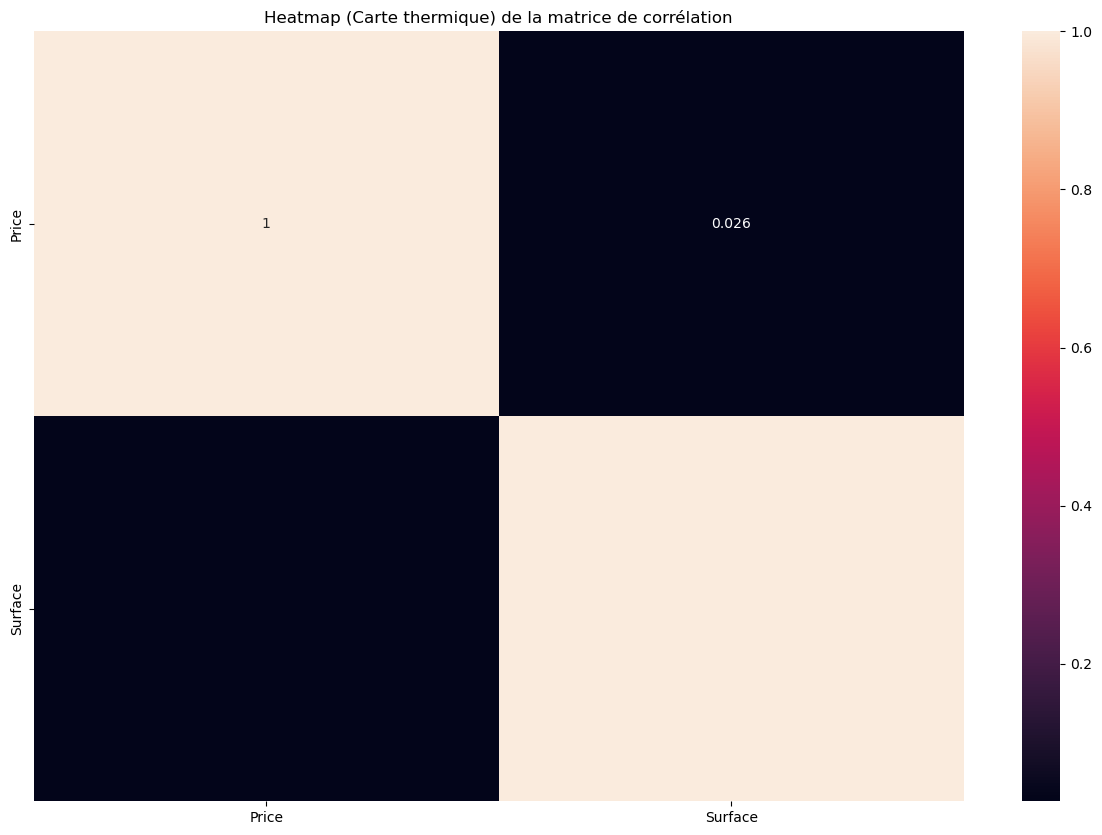

In [80]:
    # Création d'une nouvelle figure pour chaque variable
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True)
    plt.title('Heatmap (Carte thermique) de la matrice de corrélation')
    plt.show()

**Interpretation :** Dans ce diagramme de dispersion, vous verriez probablement que les points ne forment aucun motif linéaire clair, confirmant visuellement la très faible corrélation entre les deux variables

<br>


#### Analyse Univarié des variables quantitatives

##### Histogramme et Boîte à moustaches :

Chaque graphique montre comment les valeurs de chaque variable sont réparties, nous aident à visualiser la distribution des données quantitatives, à identifier les tendances et à détecter les anomalies ou les valeurs aberrantes.


C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


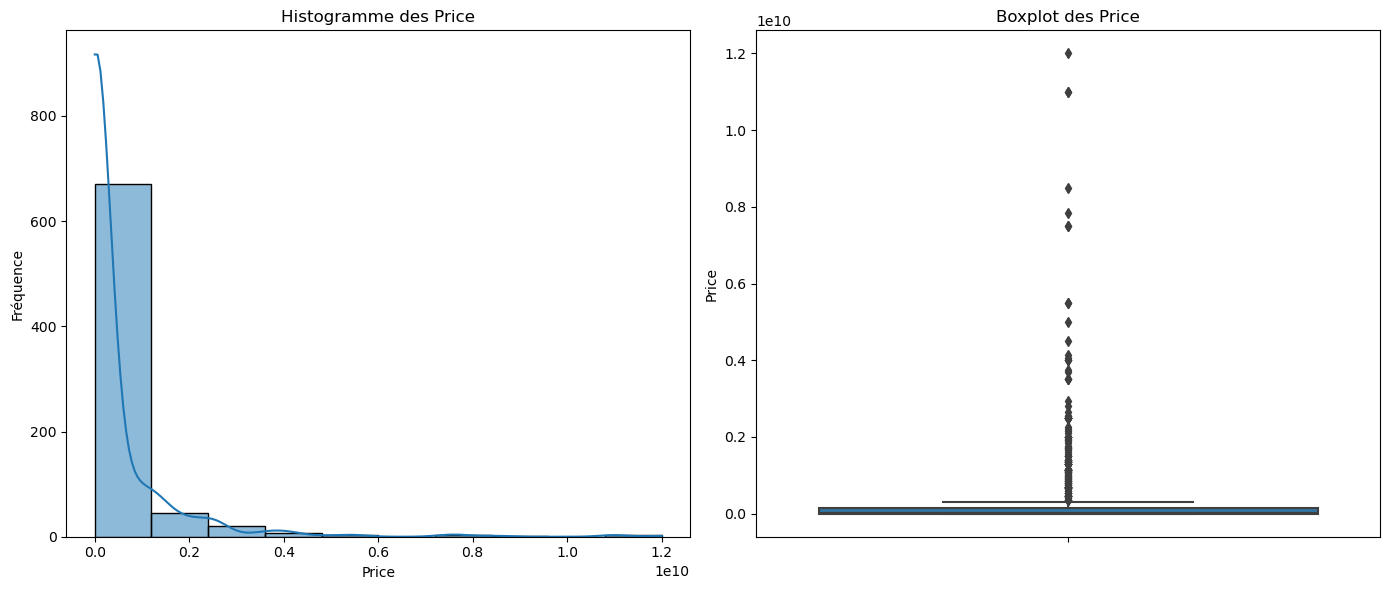

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


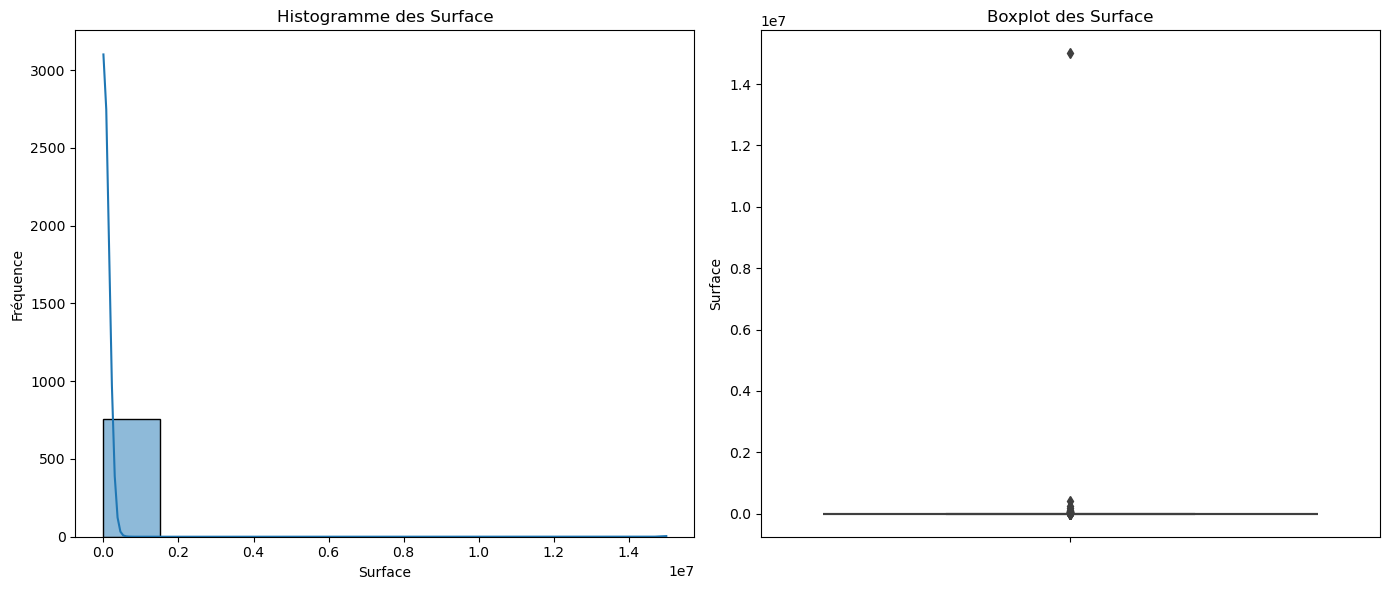

In [222]:
for col in data_quantitatives.columns:
    plt.figure(figsize=(14, 6))
    
    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(data_quantitatives[col], bins=10, kde=True)
    plt.title(f'Histogramme des {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    
    # Boîte à moustaches
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data_quantitatives[col])
    plt.title(f'Boîte à moustaches des {col}')
    plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()


#### Interprétation :

-  Les histogrammes ont une queue allongée du côté droite ce qui signifie que la distribution de nos variables quantitatives est `asymétrique`.
-  Les Boîte à moustaches on voit que la médiane est décalée vers un côté de la boîte, et les moustaches sont de longueurs différentes ce qui traduit aussi une distribution `Asymétrique`.
   <br>
   <br>


#### Visualisation des valeurs abérants des données quantitatives


In [1]:
# A enlever
for var in data_quantitatives :
    plt.figure()
    sns.boxplot(x=var, data=data_quantitatives)

NameError: name 'data_quantitatives' is not defined

#### Interprétation des boxplots (Boite à moustaches) :

-  La ligne centrale dans chaque boîte représente la médiane des données.
-  Les bords de la boîte représentent le premier (Q1) et le troisième quartile (Q3), donc l'interquartile.
-  Les "moustaches" (lignes) s'étendent pour montrer l'étendue des données, en excluant les valeurs aberrantes.
-  Les points en dehors des moustaches sont considérés comme des valeurs aberrantes potentielles.

Ces visualisations nous aident à comprendre la distribution des données, les asymétries, et à identifier les valeurs aberrantes.

<br>


#### Analyse Univarié des variables qualitatives

##### Countplot (Compteur) : qui est une représentation graphique de la fréquence des différentes catégories d'une variable qualitative


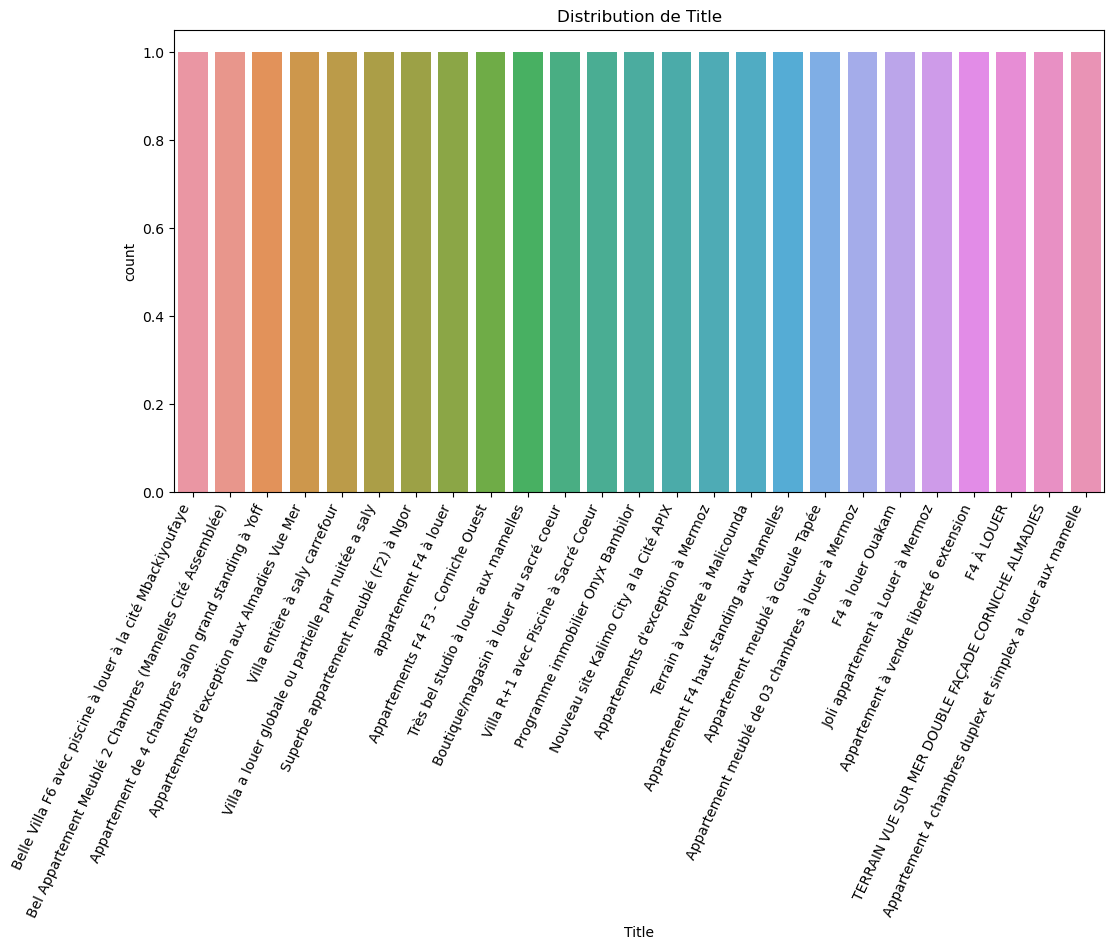

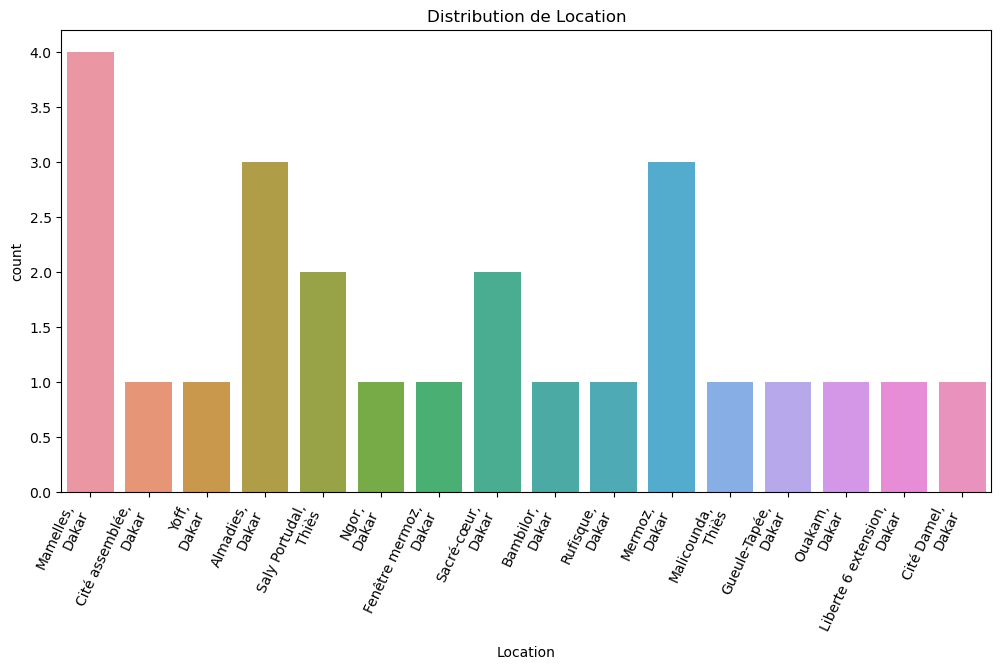

In [249]:
# Sélection d'un échantillon aléatoire de 25 lignes pour la visualisation
data_qualitatives_subset = data_qualitatives.sample(25, random_state=42)
#random_state=42 assure que l'échantillon est reproductible. On obtient toujours le même échantillon chaque fois que nous exécutons ce code avec cette valeur de random_state.

# Création des countplots pour chaque variable qualitative
for var in data_qualitatives_subset:
    # Crée une nouvelle figure
    plt.figure(figsize=(12, 6))
    # Crée un countplot pour la variable actuelle
    sns.countplot(x=data_qualitatives_subset[var])
    # Ajoute un titre pour chaque countplot
    plt.title(f'Distribution de {var}')
    # Ajoute une étiquette pour l'axe x
    plt.xlabel(var)  
    # Fait pivoter les étiquettes de l'axe x pour une meilleure lisibilité
    plt.xticks(rotation=65, ha='right')

# Affichage des graphiques
plt.show()

#### Interprétation :

Pour la variable `Titre` dans notre échantillon de 25 lignes, toutes les annonces ont la meme fréquence de 1.0 .

Pour les `localisations` dans notre échantillon de 25 occurences `Mamelles, Dakar` est la localisation la plus fréquente dans l'échantillon avec une fréquence de 4.0, suivi de `Almadies et Mermoz, Dakar` avec une fréquence de 3.0 et de `saly portudal, Thiès et Sacré-coeur` avec une fréquence de 2.0 . Les autres restent constante avec 1.0 de fréquence.

Dans notre échantillon on constate que les Biens immobiliers on une fréquence égale, cela suggère que ces biens ont la meme fréquence d'achat, ce qui peut indiquer une forte demande ou une offre abondante dans ces biens.

<br>


In [251]:
# Supposons que 'Title' est la colonne qui contient les titres des annonces
titre_le_plus_frequent = data_qualitatives['Title'].mode()[0]

print(f"Le titre le plus fréquent est : {titre_le_plus_frequent}")

Le titre le plus fréquent est : Appartement à louer à Ngor Almadies


### Analyse Bivarié

Une analyse bivariée est une méthode statistique utilisée pour explorer la relation entre deux variables. Contrairement à l'analyse univariée, qui examine une seule variable, l'analyse bivariée examine simultanément deux variables pour comprendre comment elles interagissent ou sont associées.


#### 1- Analyse Bivariée entre deux variables quantitatives

##### Scatter Plot (Diagramme de dispersion) : Pour explorer la relation entre les Prix et les Surface des biens immobiliers.


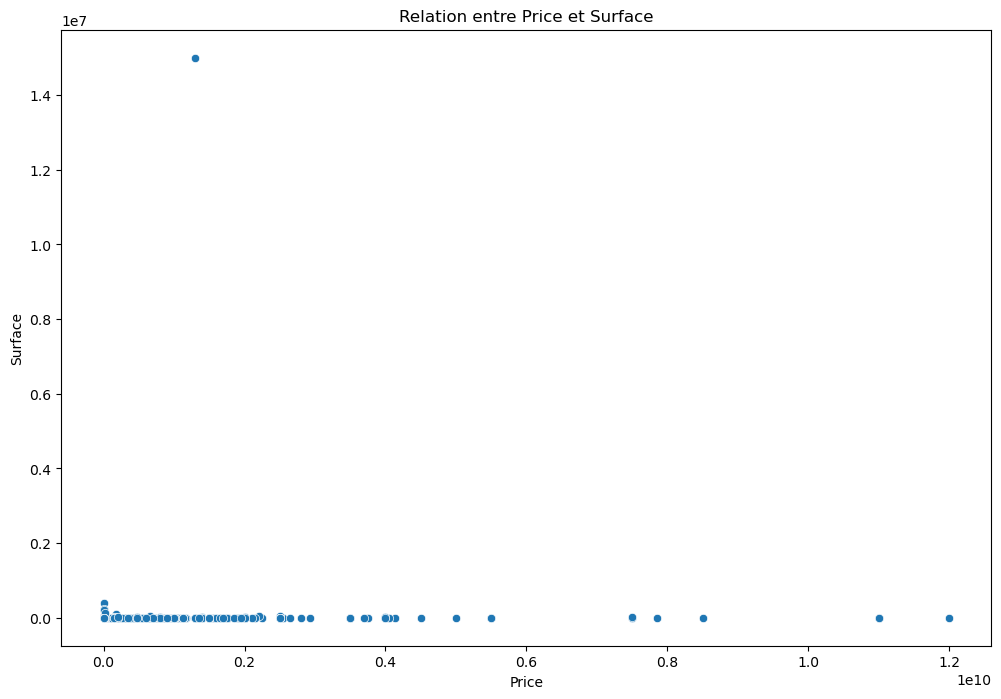

In [200]:
x='Price'
y='Surface'

plt.figure(figsize=(12, 8))
#  création d'un scatter plot des variables "Surface" et "Price".
sns.scatterplot(x='Price', y='Surface', data=data_quantitatives)
# ajout d'un titre au graphique.
plt.title(f'Relation entre {x} et {y}')
# ajout des étiquettes aux axes x et y respectivement.
plt.xlabel(x)
plt.ylabel(y)
plt.show()

#### Interprétation :

    - D'abord on crée un scatter plot (nuage de points) en utilisant les colonnes "Price" et "Surface" du DataFrame data. Chaque point sur le graphique représente une observation de notre ensemble de données, avec la valeur "Price" sur l'axe des x et la valeur "Surface" sur l'axe des y.

    - Observez la distribution des points. Les points forment une tendance un peu ascendante, cela peut indiquer une relation positive entre le prix et la surface, ce qui signifie que les biens immobiliers plus grands tendent à avoir un prix plus élevé.

    - Les zones où les points sont plus concentrés indiquent des plages de valeurs communes pour les variables "Price" et "Surface".

    - Le point qui est loin de la majorité des données, indique des anomalies ou des valeurs aberrantes dans nos données.

Ce graphique est un outil puissant pour explorer et visualiser la relation entre les deux variables quantitatives dans nos données immobilières.

<br>


#### 2- Analyse Bivariée entre deux variables qualitatives

##### Tableau de contingence (crosstab) et Test du Chi-Carré : pour explorer la relation de dépendance ou d'indépendance entre deux variables qualitatives, et mesurer l'association entre les catégories.


In [130]:
# Tableau de contingence (crosstab)
contingency_table = pd.crosstab(data['Location'], data['Title'])
print(contingency_table)

# test du chi-carré
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")


Title                     190m2 angle à Kounoune Cité des Enseignants  \
Location                                                                
Almadies,\nDakar                                                    0   
Amitié,\nDakar                                                      0   
Autres,\nAutres                                                     0   
Avenue Bourguiba,\nDakar                                            0   
Bambilor,\nDakar                                                    0   
...                                                               ...   
Virage,\nDakar                                                      0   
Yene,\nDakar                                                        0   
Yoff,\nDakar                                                        0   
Zac Mbao,\nDakar                                                    0   
Zone de captage,\nDakar                                             0   

Title                     200m2 à la cité Racine s

#### Interprétation :

    p-value est faible (< 0.05) ce qui indique une relation significative entre les variables qualitatives.

<br>


#### 3- Analyse Bivariée entre une variable quantitative et une variable qualitative :

##### Diagramme en boîte (box plot) : pour comparer les distributions d'une variable quantitative à travers les catégories d'une variable qualitative, et tester si les moyennes des groupes sont significativement différentes.


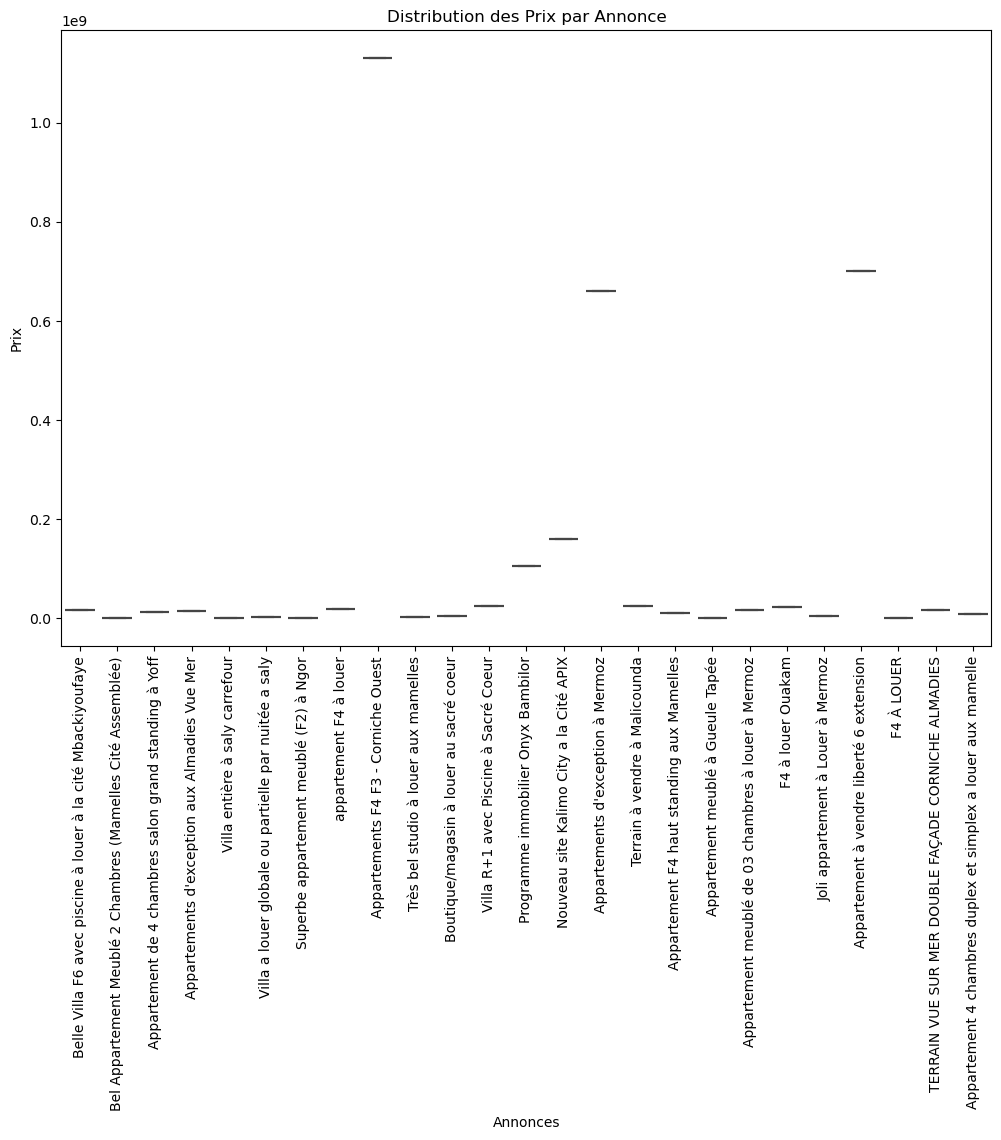

In [151]:
# Limitons le nombre d'annonces affichées
sampled_data = data.sample(25, random_state=42)  # Exemple avec un échantillon aléatoire de 25 annonces

# Créons le boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Title', y='Price', data=sampled_data)
plt.title('Distribution des Prix par Annonce')
plt.xlabel('Annonces')
plt.ylabel('Prix')
plt.xticks(rotation=90)
plt.show()


#### Interprétation :

Les boîtes montrent les quartiles et les outliers. Les différences dans les médianes et les étendues interquartiles entre les catégories peuvent indiquer des différences significatives.

<br>


#### Affichage des annonces les plus fréquentes :


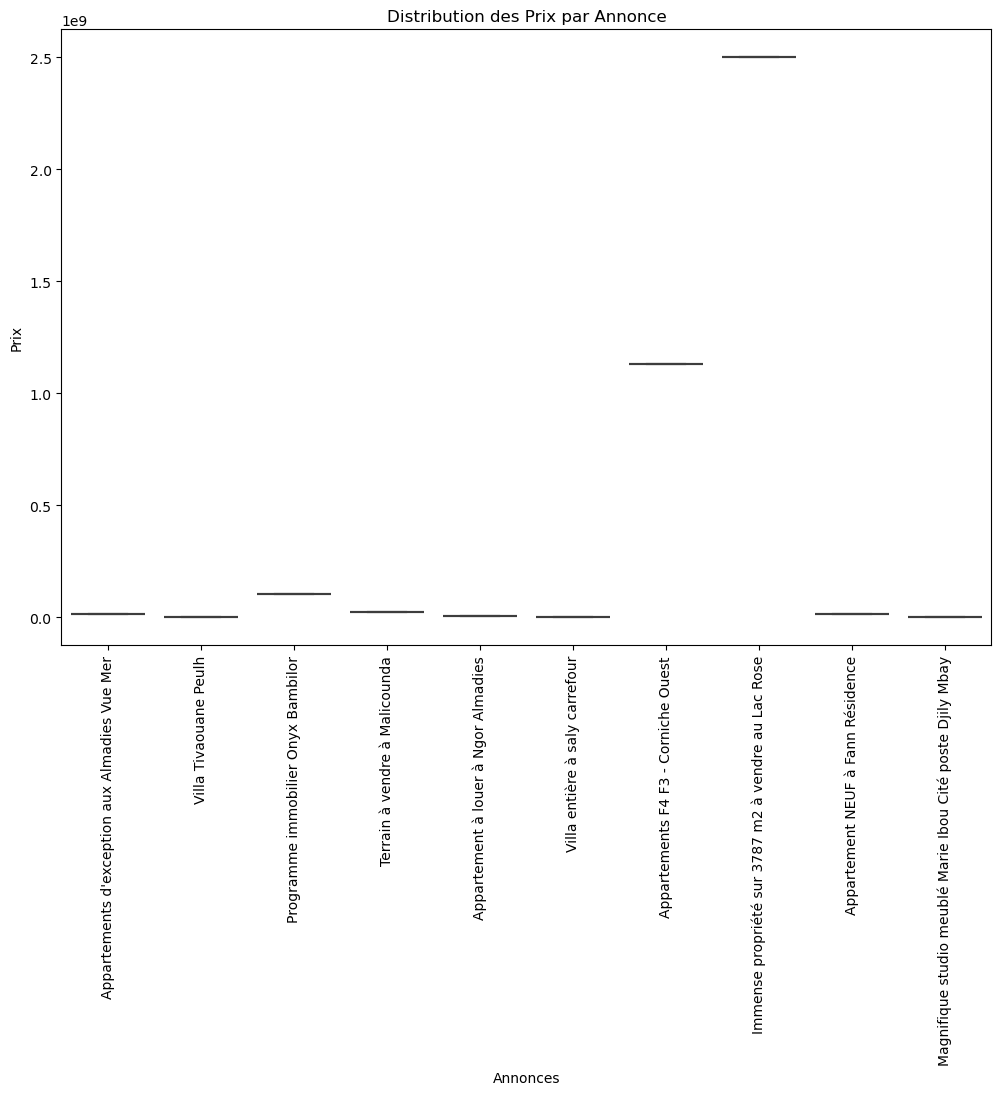

In [145]:
# Sélectionner les 10 annonces les plus fréquentes
top_titles = data['Title'].value_counts().index[:10]
# Filtrage des données pour ne conserver que les titres les plus fréquents
filtered_data = data[data['Title'].isin(top_titles)]
plt.figure(figsize=(12, 8))
sns.boxplot(x='Title', y='Price', data=filtered_data)
plt.title('Distribution des Prix par Annonce')
plt.xlabel('Annonces')
plt.ylabel('Prix')
plt.xticks(rotation=90)
plt.show()


#### Interprétation :

Dans ce graphique on voit clairement les annonces les plus fréquents avec leurs prix et on constate que `"Immense propriété sur 3787 m² à vendre au lac Rose"` est l'annonce la plus chère entre ces 10 les plus fréquents. suivi de `Appartements F4 et F3 - Corniche OUest` et des autres 8 annonces qui ont des prix avec une différence moins importante.

<br>


# Conclusion


## Résumé des objectifs et des résultats

Ce projet de web scraping avait pour objectif de collecter et d'analyser des données sur les annonces immobilières publiées sur le site Expat Dakar. Grâce à l'utilisation d'outils et de technologies appropriés tels que Requests, BeautifulSoup, Pandas, et Matplotlib, nous avons pu extraire et structurer une quantité significative de données pertinentes. L'analyse des données a révélé des tendances intéressantes concernant le marché immobilier à Dakar, notamment en termes de types de biens, de prix, et de localisation géographique.

## Limitations du projet

Malgré les résultats prometteurs, ce projet présente certaines limitations. La collecte de données a été limitée à un nombre défini de pages du site, ce qui pourrait ne pas représenter l'intégralité du marché immobilier. De plus, les annonces peuvent varier en qualité et en complétude des informations fournies, ce qui peut influencer l'exactitude des analyses. Enfin, les données étant statiques, elles ne reflètent qu'un instantané du marché immobilier au moment du scraping.

## Perspectives et recommandations

Pour les futures recherches, il serait bénéfique d'étendre la collecte de données sur une période plus longue pour capturer les variations saisonnières et les tendances à long terme du marché immobilier. L'utilisation de techniques de machine learning pourrait également être explorée pour prédire les tendances du marché basées sur les données historiques. De plus, l'intégration de sources de données supplémentaires, telles que des données économiques ou démographiques, pourrait enrichir l'analyse et fournir des insights encore plus précieux.

En conclusion, ce projet a démontré l'utilité du web scraping pour obtenir des données pertinentes et actuelles sur le marché immobilier à Dakar. Les insights obtenus peuvent aider les investisseurs, les acheteurs potentiels et les professionnels du secteur à prendre des décisions éclairées. Cependant, une analyse continue et une collecte de données plus étendue sont nécessaires pour maintenir à jour notre compréhension du marché immobilier.
